<a href="https://colab.research.google.com/github/kaybrian/Chatbot_ML_T1/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import libs
in the first steep of the project, we are going to import all the needed libraries for the project


In [1]:
import numpy as np
import codecs
import tensorflow as tf
import pandas as pd
import ast
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

2024-10-23 09:23:59.175652: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## import the data
First import the data to be used in the projct

In [7]:
data = pd.read_csv('../data/csv/converted_data.csv')

In [8]:
print(data.shape)
data.head()

(188, 4)


,Questions,Answers,Patterns,Tags
0,What to do if Cuts?,Wash the cut properly to prevent infection and...,"What to do if Cuts?,How to cure Cuts?,Which me...",Cuts
1,How to cure Cuts?,Wash the cut properly to prevent infection and...,"What to do if Cuts?,How to cure Cuts?,Which me...",Cuts
2,Which medicine to apply for Cuts?,Wash the cut properly to prevent infection and...,"What to do if Cuts?,How to cure Cuts?,Which me...",Cuts
3,what to apply on cuts?,Wash the cut properly to prevent infection and...,"What to do if Cuts?,How to cure Cuts?,Which me...",Cuts
4,Cuts,Wash the cut properly to prevent infection and...,"What to do if Cuts?,How to cure Cuts?,Which me...",Cuts


### Cheking if there is null or not



### Extract useful data
In this step, we need to get only useful information for the project.

Main concern is (question, answer) pair columns only

In [15]:
data_df = data[['Questions', 'Answers']]
data_df.head()

,Questions,Answers
0,What to do if Cuts?,Wash the cut properly to prevent infection and...
1,How to cure Cuts?,Wash the cut properly to prevent infection and...
2,Which medicine to apply for Cuts?,Wash the cut properly to prevent infection and...
3,what to apply on cuts?,Wash the cut properly to prevent infection and...
4,Cuts,Wash the cut properly to prevent infection and...


### extract useful words now


In [16]:
total_strings = data_df['Questions'].values.tolist() + data['Answers'].values.tolist()
all_strings = " ".join(total_strings)
pattern = re.compile(r"[\w]*'[\w]*")
matchings = re.findall(pattern, all_strings)

In [11]:
# show the extracteed words
set(matchings)


{"She's",
 "when's",
 "blamin'",
 "they'll",
 "'this",
 "speakin'",
 "Lippman's",
 "'gain",
 "I'D",
 "Hemingway's",
 "'34",
 "6's",
 "Erica's",
 "Kirsty's",
 "hair'll",
 "beginnin'",
 "Get'chu",
 "Bensinger's",
 "Caiman's",
 "Where're",
 "puttin'",
 "heck're",
 "There'd",
 "photographer's",
 "thin'",
 "Mookie's",
 "morir'",
 "chainin'",
 "anything's",
 "Kuato's",
 "President's",
 "Danny's",
 "Gonna'",
 "Belgium's",
 "Thompson's",
 "y'ready",
 "rampagin'",
 "deceased's",
 "We'd",
 "'Cept",
 "'Las",
 "juice'll",
 "Sally's",
 "'Times",
 "Elmer's",
 "bed's",
 "'sit",
 "PRESIDENT'S",
 "dumber'n",
 "Wynant's",
 "filter's",
 "'been",
 "These'll",
 "Sweeney's",
 "Ruben's",
 "'Ere",
 "m'dear",
 "libido's",
 "never've",
 "life'",
 "Waldman's",
 "movie's",
 "Navigator's",
 "'Daddy",
 "firm'll",
 "robbin'",
 "cryin'",
 "ma'",
 "Wha'cha",
 "Malone's",
 "matter's",
 "Annabelle's",
 "Elton's",
 "Te's",
 "Fire's",
 "Rammellzee's",
 "nobody's",
 "you'n",
 "Thaaaat's",
 "'claustrophobic",
 "girlfriend's

### Data Preprocessing
Removing special characters and doing decontraction



In [20]:
def decontractions(phrase):
    #specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase

def preprocess(text):
    text = text.lower()
    text = decontractions(text)
    text = re.sub('[^A-Za-z0-9 ]+', '', text)
    return text


data_df['Questions'] = data_df['Questions'].apply(preprocess)
data_df['Answers'] = data_df['Answers'].apply(preprocess)
data.head()

,Questions,Answers,Patterns,Tags
0,What to do if Cuts?,Wash the cut properly to prevent infection and...,"What to do if Cuts?,How to cure Cuts?,Which me...",Cuts
1,How to cure Cuts?,Wash the cut properly to prevent infection and...,"What to do if Cuts?,How to cure Cuts?,Which me...",Cuts
2,Which medicine to apply for Cuts?,Wash the cut properly to prevent infection and...,"What to do if Cuts?,How to cure Cuts?,Which me...",Cuts
3,what to apply on cuts?,Wash the cut properly to prevent infection and...,"What to do if Cuts?,How to cure Cuts?,Which me...",Cuts
4,Cuts,Wash the cut properly to prevent infection and...,"What to do if Cuts?,How to cure Cuts?,Which me...",Cuts


In [21]:
q_lengths = data_df['Questions'].str.split().apply(len)
a_lengths = data_df['Answers'].str.split().apply(len)

In [22]:
from tqdm import tqdm
all_ques = " ".join(data_df['Questions'].values)
all_ans = " ".join(data_df['Answers'].values)
word_cnt_a = {}
for i in tqdm(all_ans.split()): word_cnt_a[i] = word_cnt_a.get(i, 0) + 1
word_cnt_q = {}
for i in tqdm(all_ques.split()): word_cnt_q[i] = word_cnt_q.get(i, 0) + 1

100%|██████████| 1300/1300 [00:00<00:00, 982626.64it/s]


In [23]:
word_ordered_a = sorted(word_cnt_a, key=lambda x: word_cnt_a[x], reverse=True)
top_20_a = word_ordered_a[:20]
cnts_20_a = [word_cnt_a[i] for i in top_20_a]

word_ordered_q = sorted(word_cnt_q, key=lambda x: word_cnt_q[x], reverse=True)
top_20_q = word_ordered_q[:20]
cnts_20_q = [word_cnt_q[i] for i in top_20_q]

In [24]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
def plot(top_words, counts):
    fig, ax = plt.subplots()

    # Save the chart so we can loop through the bars below.
    bars = ax.bar(
        x=np.arange(len(top_words)),
        height=counts,
        tick_label=top_words
    )

    # Axis formatting.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    # Add text annotations to the top of the bars.
    bar_color = bars[0].get_facecolor()
    for bar in bars:
      ax.text(
          bar.get_x() + bar.get_width() / 2,
          bar.get_height() + 0.3,
          round(bar.get_height(), 1),
          horizontalalignment='center',
          color=bar_color,
          weight='bold'
      )

    # Add labels and a title. Note the use of `labelpad` and `pad` to add some
    # extra space between the text and the tick labels.
    ax.set_xlabel('Word', labelpad=15, color='#333333')
    ax.set_ylabel('Count', labelpad=15, color='#333333')
    ax.set_title("Most usual words in reply/answers", pad=15, color='#333333',
                 weight='bold')

    fig.tight_layout()

ModuleNotFoundError: No module named 'seaborn'

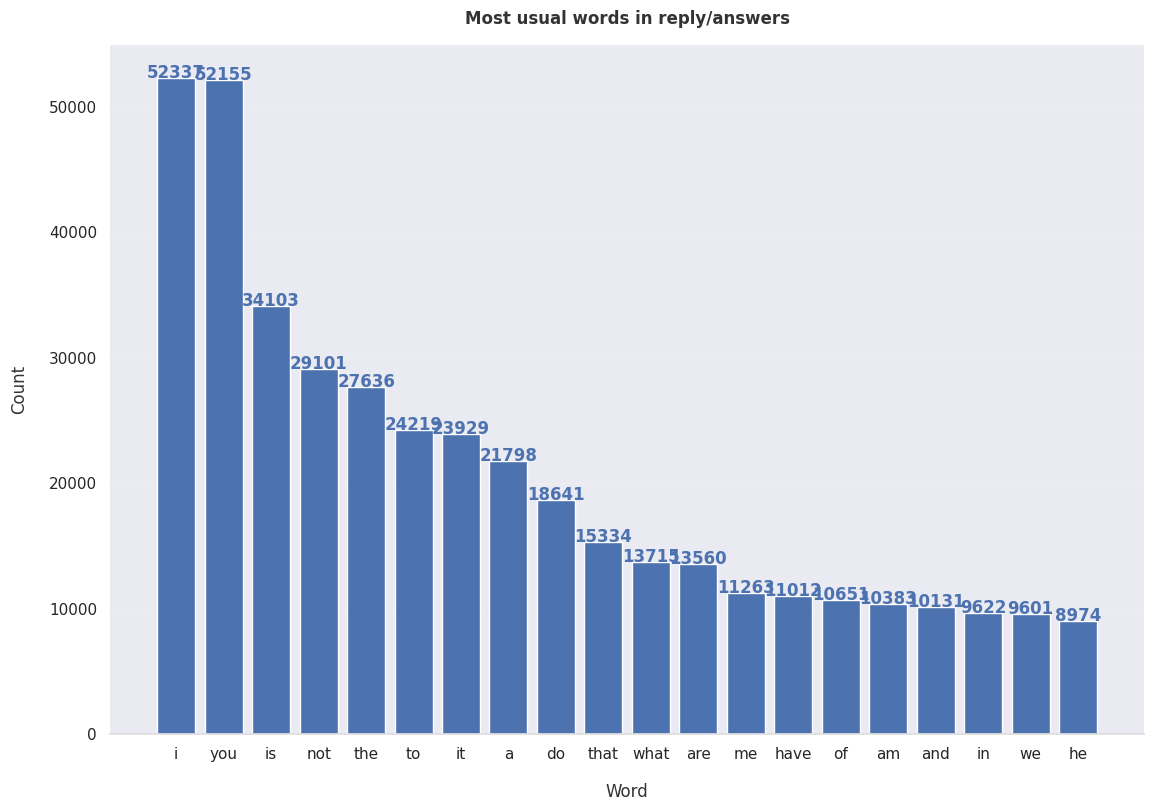

In [17]:
plot(top_20_a, cnts_20_a)


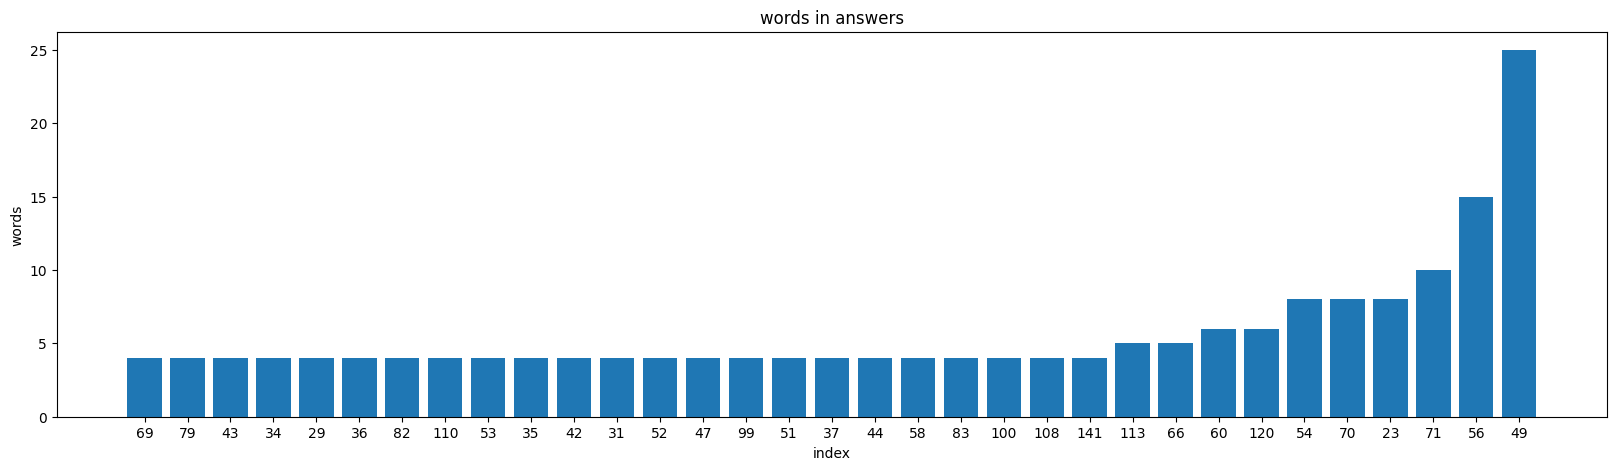

In [25]:
answer_count = data_df['Answers'].str.split().apply(len).value_counts()
word_dict = dict(answer_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('words')
plt.xlabel('index')
plt.title('words in answers')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [26]:
# Minimum no. of words required
for i in range(0,101,10):
    print(i,np.percentile(q_lengths, i))
print("="*80)
for i in range(90,101):
    print(i,np.percentile(q_lengths, i))
print("="*80)
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(q_lengths, i))

0 1.0
10 4.0
20 5.0
30 6.0
40 6.0
50 7.0
60 8.0
70 8.0
80 9.0
90 9.0
100 11.0
90 9.0
91 9.0
92 10.0
93 10.0
94 10.0
95 10.0
96 10.0
97 10.0
98 10.0
99 11.0
100 11.0
99.1 11.0
99.2 11.0
99.3 11.0
99.4 11.0
99.5 11.0
99.6 11.0
99.7 11.0
99.8 11.0
99.9 11.0
100 11.0


## encoder decoder
Adding <start>, <end> tokens, for to apply one time-shifted technique!


In [27]:
data_df['answer_in'] = '<start> ' + data_df['Answers'].astype(str)
data_df['answer_out'] = data_df['Answers'].astype(str) + ' <end>'
data_df.head()

,Questions,Answers,answer_in,answer_out
0,what to do if cuts,wash the cut properly to prevent infection and...,<start> wash the cut properly to prevent infec...,wash the cut properly to prevent infection and...
1,how to cure cuts,wash the cut properly to prevent infection and...,<start> wash the cut properly to prevent infec...,wash the cut properly to prevent infection and...
2,which medicine to apply for cuts,wash the cut properly to prevent infection and...,<start> wash the cut properly to prevent infec...,wash the cut properly to prevent infection and...
3,what to apply on cuts,wash the cut properly to prevent infection and...,<start> wash the cut properly to prevent infec...,wash the cut properly to prevent infection and...
4,cuts,wash the cut properly to prevent infection and...,<start> wash the cut properly to prevent infec...,wash the cut properly to prevent infection and...


In [28]:
data_final = data_df.drop(['Answers'], axis=1)
data_final.head()

,Questions,answer_in,answer_out
0,what to do if cuts,<start> wash the cut properly to prevent infec...,wash the cut properly to prevent infection and...
1,how to cure cuts,<start> wash the cut properly to prevent infec...,wash the cut properly to prevent infection and...
2,which medicine to apply for cuts,<start> wash the cut properly to prevent infec...,wash the cut properly to prevent infection and...
3,what to apply on cuts,<start> wash the cut properly to prevent infec...,wash the cut properly to prevent infection and...
4,cuts,<start> wash the cut properly to prevent infec...,wash the cut properly to prevent infection and...


### Train test split of the dataset


In [29]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_final, test_size=0.3)

Adding <end> in Answer_in so that it can be tokenized by tokenizer!


In [30]:
train.iloc[0]['answer_in']= str(train.iloc[0]['answer_in'])+' <end>'
train.iloc[0]['answer_out']= str(train.iloc[0]['answer_out'])+' <end>'

In [31]:
data_df.head()

,Questions,Answers,answer_in,answer_out
0,what to do if cuts,wash the cut properly to prevent infection and...,<start> wash the cut properly to prevent infec...,wash the cut properly to prevent infection and...
1,how to cure cuts,wash the cut properly to prevent infection and...,<start> wash the cut properly to prevent infec...,wash the cut properly to prevent infection and...
2,which medicine to apply for cuts,wash the cut properly to prevent infection and...,<start> wash the cut properly to prevent infec...,wash the cut properly to prevent infection and...
3,what to apply on cuts,wash the cut properly to prevent infection and...,<start> wash the cut properly to prevent infec...,wash the cut properly to prevent infection and...
4,cuts,wash the cut properly to prevent infection and...,<start> wash the cut properly to prevent infec...,wash the cut properly to prevent infection and...


In [32]:
# drop the answer_in and answer_out
train = train.drop(['answer_in', 'answer_out'], axis=1)
validation = validation.drop(['answer_in', 'answer_out'], axis=1)

In [34]:
# save the new train and validation data
train.to_csv('train.csv', index=False)
validation.to_csv('validation.csv', index=False)


data.head()

,Questions,Answers,Patterns,Tags
0,What to do if Cuts?,Wash the cut properly to prevent infection and...,"What to do if Cuts?,How to cure Cuts?,Which me...",Cuts
1,How to cure Cuts?,Wash the cut properly to prevent infection and...,"What to do if Cuts?,How to cure Cuts?,Which me...",Cuts
2,Which medicine to apply for Cuts?,Wash the cut properly to prevent infection and...,"What to do if Cuts?,How to cure Cuts?,Which me...",Cuts
3,what to apply on cuts?,Wash the cut properly to prevent infection and...,"What to do if Cuts?,How to cure Cuts?,Which me...",Cuts
4,Cuts,Wash the cut properly to prevent infection and...,"What to do if Cuts?,How to cure Cuts?,Which me...",Cuts


In [36]:
# save the data to processed folder 
data.to_csv('../data/processed/data.csv', index=False)